## Öğrenci Performans Göstergesi

#### Makine öğrenimi Projesinin yaşam döngüsü

- Sorun Beyanını Anlama
- Veri Toplama
- Gerçekleştirilecek Veri Kontrolleri
- Keşifsel veri analizi
- Veri Ön İşleme
- Model Eğitimi
- En iyi modeli seçme

### 1) Problem ifadesi
- Bu proje, öğrencinin performansının (test puanları) Cinsiyet, Etnik Köken, Ebeveyn eğitim düzeyi, Öğle yemeği ve Sınav hazırlık kursu gibi diğer değişkenlerden nasıl etkilendiğini anlıyor.

### 2) Veri Toplama
- Veri Seti Kaynağı - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- Veriler 8 sütun ve 1000 satırdan oluşmaktadır.

### 2.1 Verileri ve Gerekli Paketleri İçe Aktar
#### Pandas, Numpy, Matplotlib, Seaborn ve Warings Kütüphanesini İçe Aktarma.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Shape of the dataset

In [4]:
df.shape

(1000, 8)

### 2.2 Dataset information

- gender :Öğrencilerin cinsiyeti -> (Erkek/Kadın)
- race/ethnicity : Öğrencilerin etnik kökeni -> (Grup A, B, C, D, E)
- parental level of education : Ebeveynlerin son eğitimi ->(lisans derecesi, bazı üniversiteler, yüksek lisans derecesi, ön lisans derecesi, lise)
- lunch : sınavdan önce öğle yemeği (standart veya ücretsiz/indirimli) 
- test preparation course : testten önce tamamlanmış veya tamamlanmamış
- math score
- reading score
- writing score

### 3. Gerçekleştirilecek Veri Kontrolleri

- Eksik değerleri kontrol et
- Yinelenenleri kontrol et
- Veri türünü kontrol et
- Her sütunun benzersiz değerlerinin sayısını kontrol et
- Veri kümesinin istatistiklerini kontrol et
- Farklı kategorik sütunlarda bulunan çeşitli kategorileri kontrol et

### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### Veri setinde eksik değer yok

### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

0

#### Veri kümesinde yinelenen değer yok

### 3.3 Veri türlerini kontrol edin

In [7]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Her sütunun benzersiz değerlerinin sayısının kontrol edilmesi

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Veri kümesinin istatistiklerini kontrol edin

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Çıkarımlar
- Yukarıdaki sayısal veri açıklamasından, tüm ortalamalar birbirine çok yakın - 66 ile 68.05 arasında;
- Tüm standart sapmalar da yakın - 14.6 ile 15.19 arasında;
- Matematik için minimum puan 0 iken, yazma için minimum çok daha yüksek = 10 ve okuma için myet daha yüksek = 17

### 3.7 Verileri Keşfetme

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
print("Cinsiyet değişkenindeki kategoriler:     ",end=" " )
print(df['gender'].unique())

print("Irk/etnik köken değişkenindeki kategoriler:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Ailenin eğitim seviyesi değişkenindeki kategoriler:",end=" " )
print(df['parental_level_of_education'].unique())

print("Öğle yemeği değişkenindeki kategoriler:     ",end=" " )
print(df['lunch'].unique())

print("Sınav hazırlık kursu değişkenindeki kategoriler:     ",end=" " )
print(df['test_preparation_course'].unique())


Cinsiyet değişkenindeki kategoriler:      ['female' 'male']
Irk/etnik köken değişkenindeki kategoriler:   ['group B' 'group C' 'group A' 'group D' 'group E']
Ailenin eğitim seviyesi değişkenindeki kategoriler: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Öğle yemeği değişkenindeki kategoriler:      ['standard' 'free/reduced']
Sınav hazırlık kursu değişkenindeki kategoriler:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('{} sayısal özellik var : {}'.format(len(numeric_features), numeric_features))
print('\n{} kategorik özellik var : {}'.format(len(categorical_features), categorical_features))


3 sayısal özellik var : ['math_score', 'reading_score', 'writing_score']

5 kategorik özellik var : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [13]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### 3.8 "Toplam Puan" ve "Ortalama" için sütun ekleme

In [14]:
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f'Matematikte tam puan alan öğrenci sayısı: {math_full}')
print(f'Yazmada tam puan alan öğrenci sayısı: {writing_full}')
print(f'Okumada tam puan alan öğrenci sayısı: {reading_full}')


Matematikte tam puan alan öğrenci sayısı: 7
Yazmada tam puan alan öğrenci sayısı: 14
Okumada tam puan alan öğrenci sayısı: 17


In [16]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"Matematikte 20'den az puan alan öğrenci sayısı: {math_less_20}")
print(f"Yazmada 20'den az puan alan öğrenci sayısı: {writing_less_20}")
print(f"Okumada 20'den az puan alan öğrenci sayısı: {reading_less_20}")


Matematikte 20'den az puan alan öğrenci sayısı: 4
Yazmada 20'den az puan alan öğrenci sayısı: 3
Okumada 20'den az puan alan öğrenci sayısı: 1


##### Çıkarımlar
- Yukarıdaki değerlerden öğrencilerin Matematikte en kötü performansı gösterdiğini anlıyoruz
- En iyi performans okuma bölümündedir

### 4. Verileri Keşfetme (Görselleştirme)
#### 4.1 Bir sonuca varmak için ortalama puan dağılımını görselleştirin.
- Histogram
- Kernel Dağıtım Fonksiyonu (KDE)

#### 4.1.1 Histogram & KDE

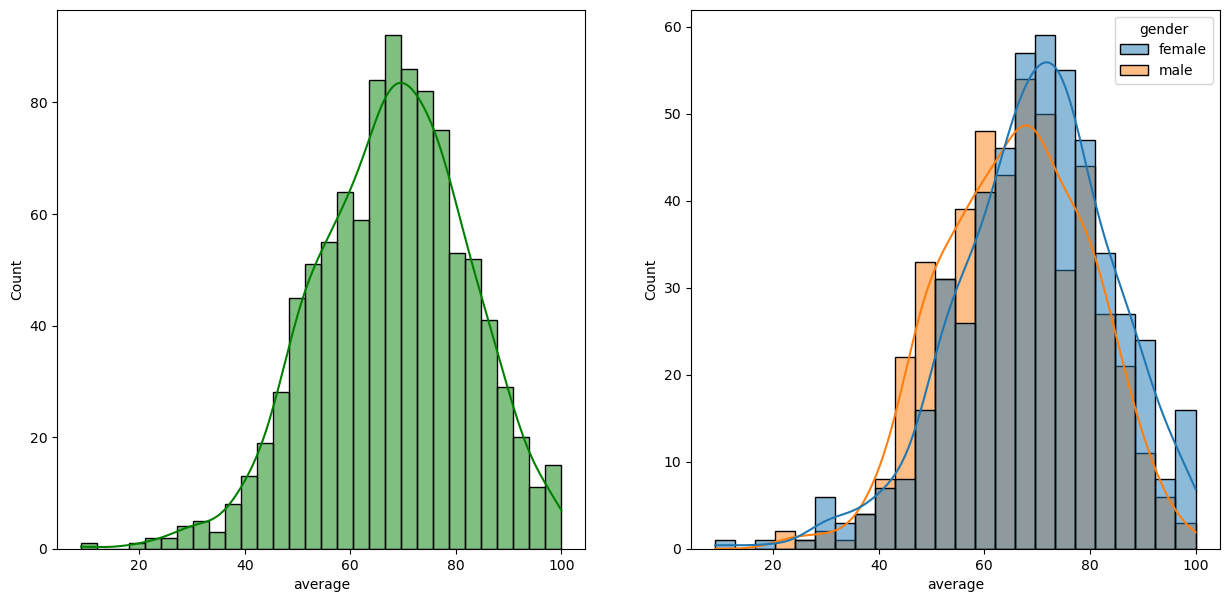

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

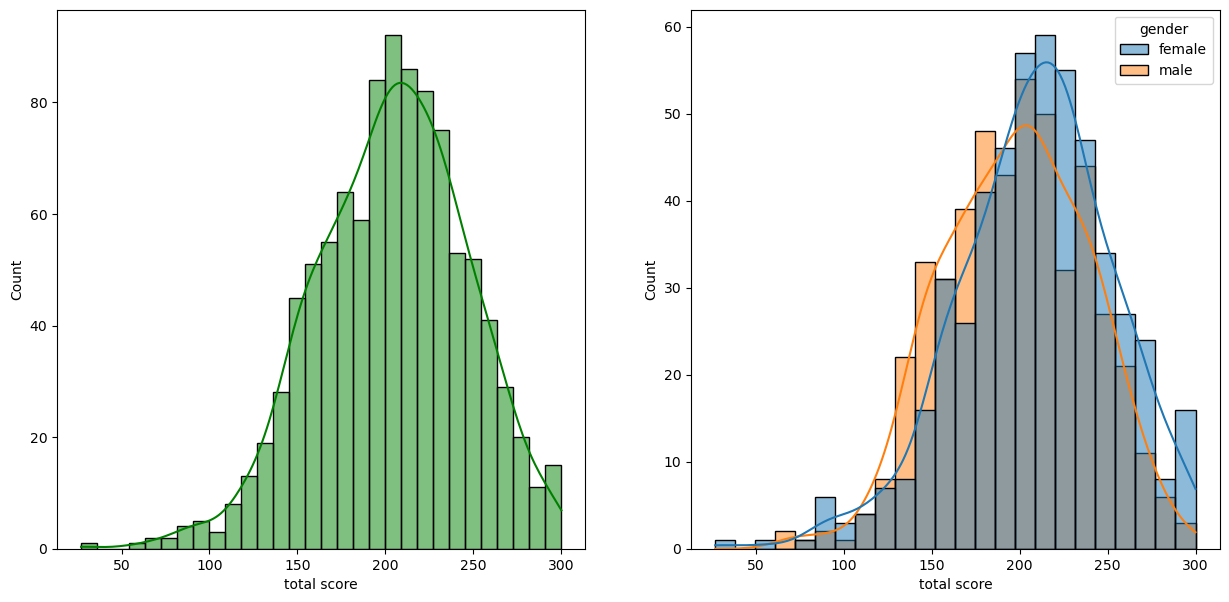

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total score',kde=True,hue='gender')
plt.show()

##### Çıkarımım
- Kız öğrenciler erkek öğrencilere göre daha iyi performans gösterme eğilimindedir.

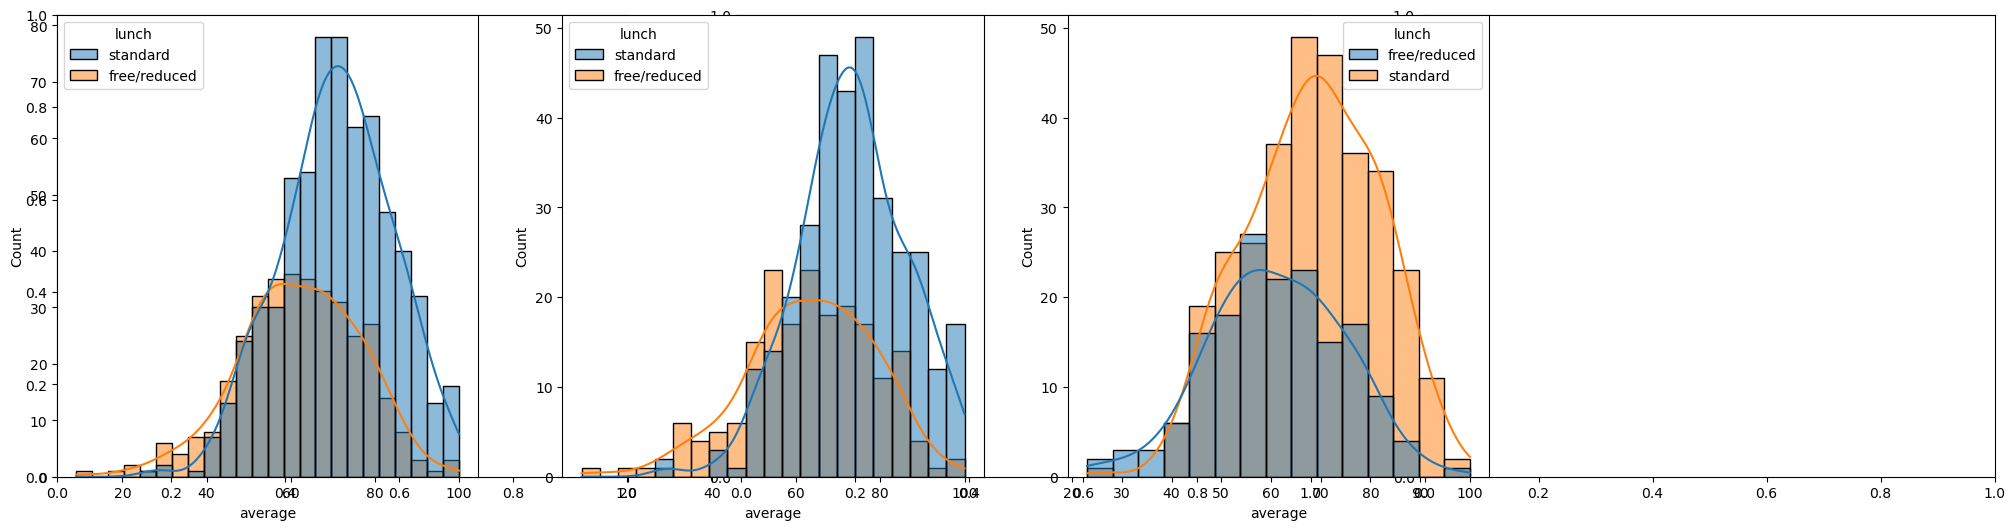

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

##### Çıkarımlar
- Standart öğle yemeği sınavlarda iyi performans göstermenize yardımcı olur.
- Standart öğle yemeği, ister erkek ister kadın olun, sınavlarda iyi performans göstermenize yardımcı olur.

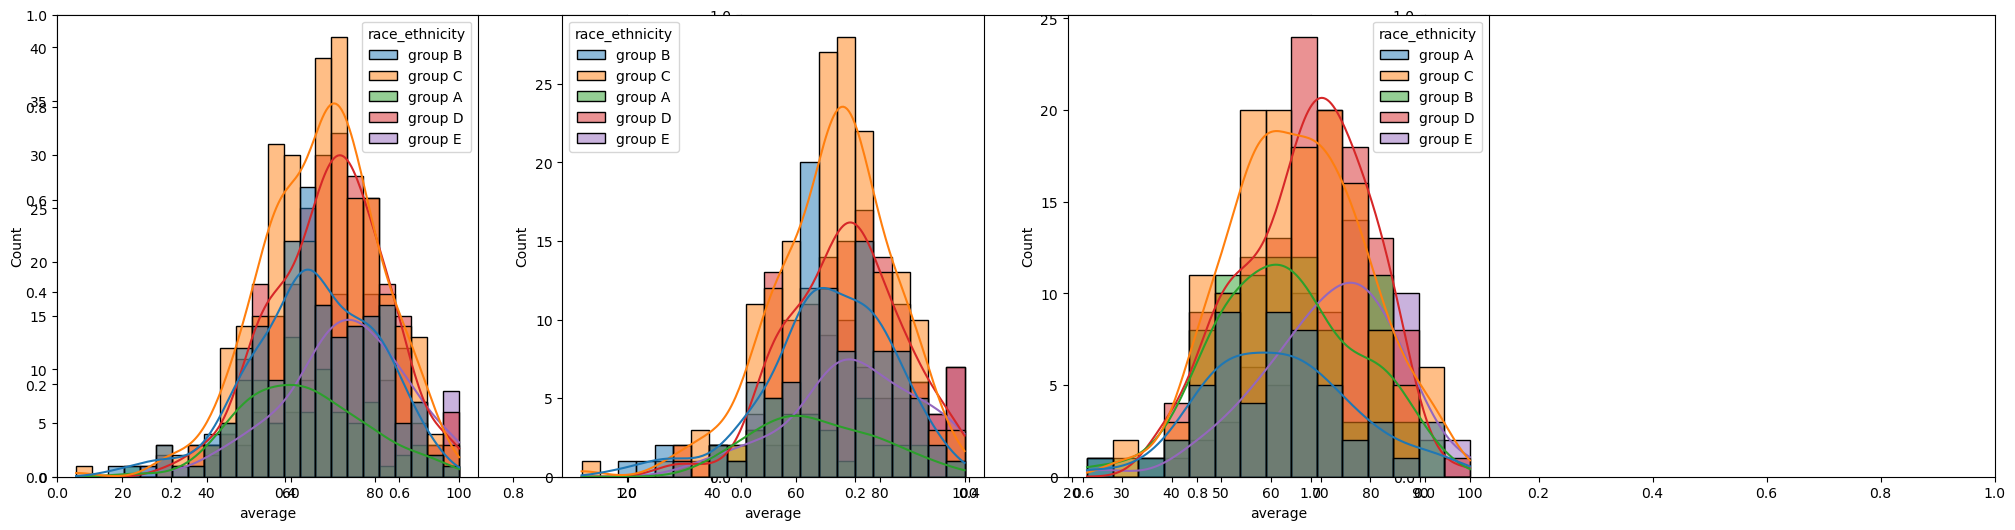

In [23]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

#####  Insights
- Students of group A and group B tends to perform poorly in exam.
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

#### 4.2 Her üç dersten öğrencilerin alabileceği en yüksek puan

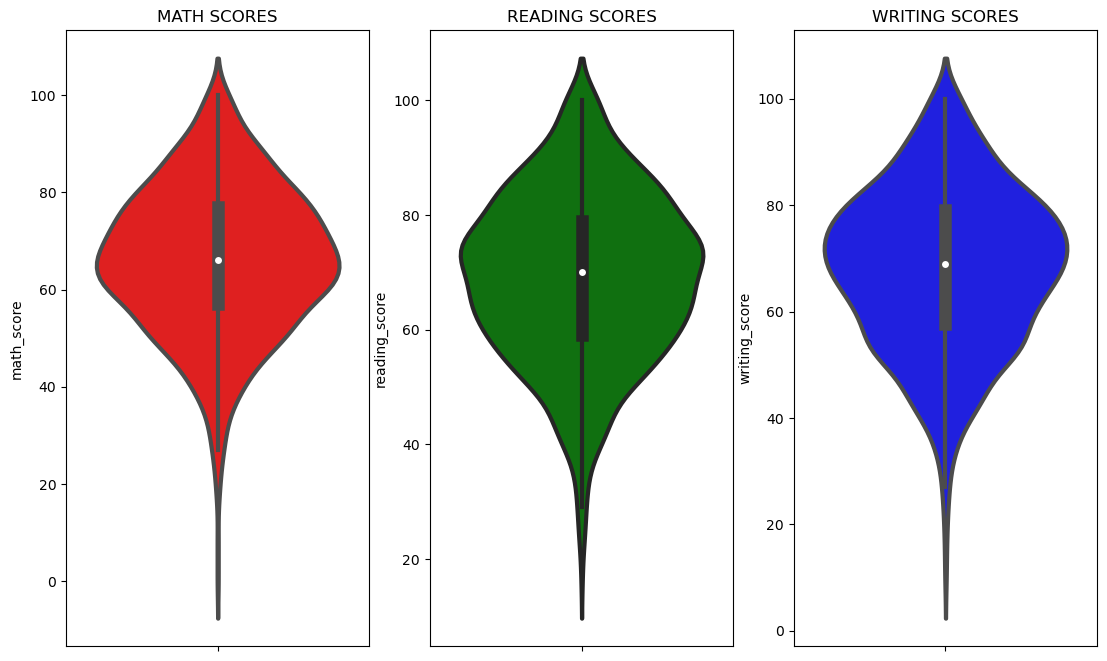

In [25]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Çıkarımlar
- Yukarıdaki üç grafikten, öğrencilerin çoğunun Matematikte 60-80 arasında puan aldığı, okuma ve yazmada ise çoğunun 50-80 arasında puan aldığı açıkça görülmektedir.

#### 4.3 Pieplot kullanılarak çok değişkenli analiz

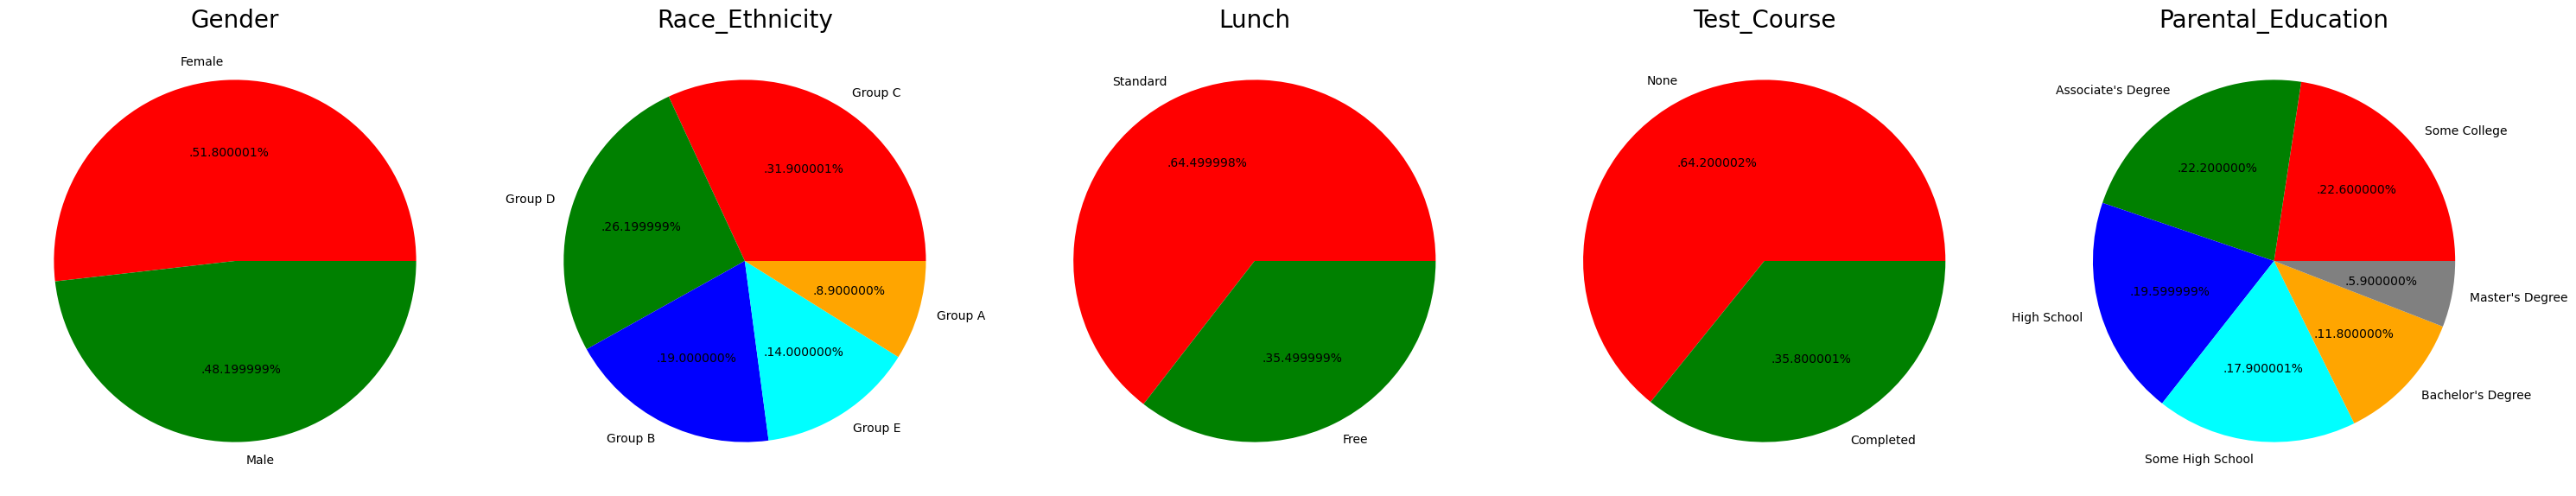

In [29]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race_Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test_Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

##### İçgörüler
- Erkek ve Kız öğrenci sayısı neredeyse eşittir
- Grup C'deki öğrenci sayısı en fazladır
- Standart öğle yemeği yiyen öğrenci sayısı daha fazladır
- Herhangi bir sınav hazırlık kursuna kaydolmamış öğrenci sayısı daha fazladır
- Ebeveyn eğitimi "Bazı Üniversite" olan öğrenci sayısı daha fazladır ve bunu "Ortak Derece" takip eder

#### 4.4 Özellik Bazlı Görselleştirme
#### 4.4.1 CİNSİYET SÜTUNU
- Cinsiyet dağılımı nasıldır?
- Cinsiyetin öğrencinin performansı üzerinde herhangi bir etkisi var mıdır?

#### TEK DEĞİŞKENLİ ANALİZ ( Cinsiyet dağılımı nasıldır ? )

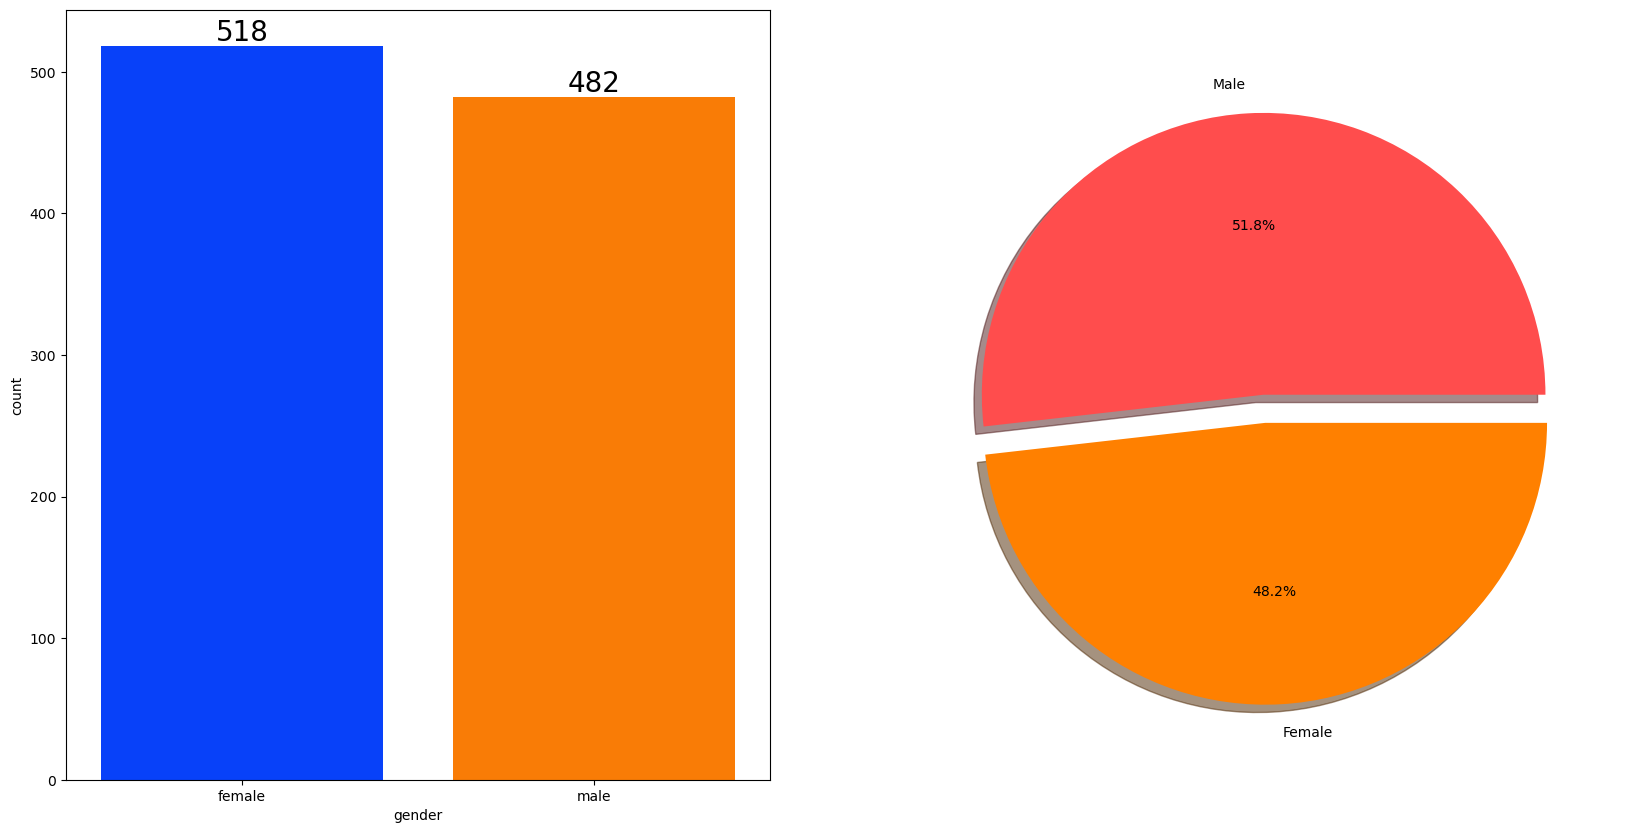

In [30]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

#### Çıkarımlar
- Cinsiyet dengeli verilerdir; kadın öğrenciler 518 (%48) ve erkek öğrenciler 482 (%52)'dir

#### İKİLİ ANALİZ ( Cinsiyetin öğrencinin performansı üzerinde herhangi bir etkisi var mıdır ? )

In [33]:
df2 = df.copy()
df2['gender'] = df2['gender'].replace({'male':1,'female':0})
df2['gender']

0      0
1      0
2      0
3      1
4      1
      ..
995    0
996    1
997    0
998    0
999    0
Name: gender, Length: 1000, dtype: int64

In [34]:

gender_group = df2.groupby('gender').count()
gender_group

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
gender,,,,,,,,,
0,518,518,518,518,518,518,518,518,518
1,482,482,482,482,482,482,482,482,482


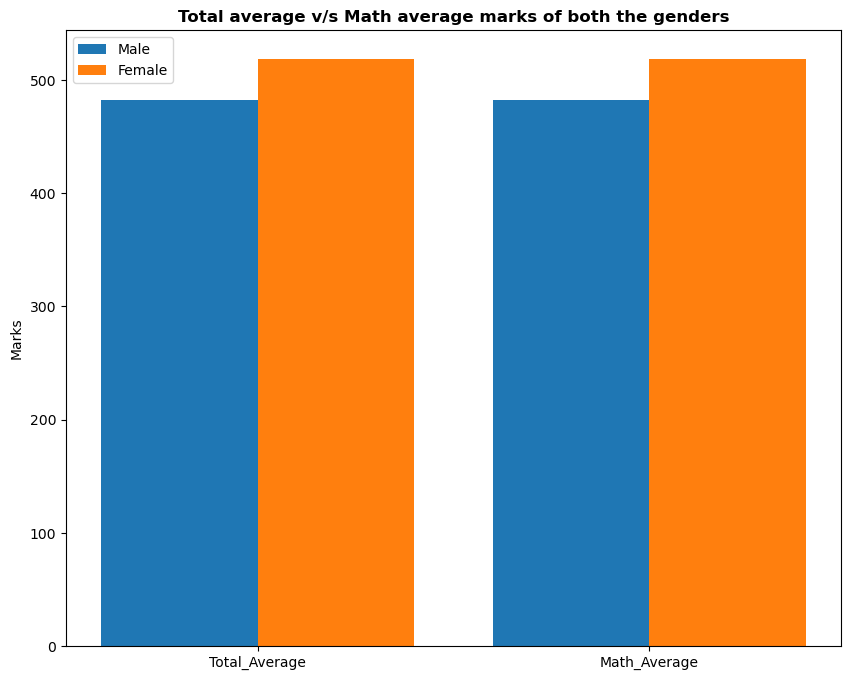

In [36]:
plt.figure(figsize=(10, 8))

X = ['Total_Average','Math_Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Çıkarımlar
- Ortalama olarak kadınların genel puanı erkeklerden daha iyidir.
- Erkekler ise Matematikte daha yüksek puanlar almıştır.

#### 4.4.2 IRK/ETNİK KÖKEN SÜTUNU
- Grup bazında dağılım nasıldır?
- Irk/Etnik kökenin öğrencinin performansı üzerinde herhangi bir etkisi var mıdır?

#### TEK DEĞİŞKENLİ ANALİZ (Grup bazında dağılım nasıl?)

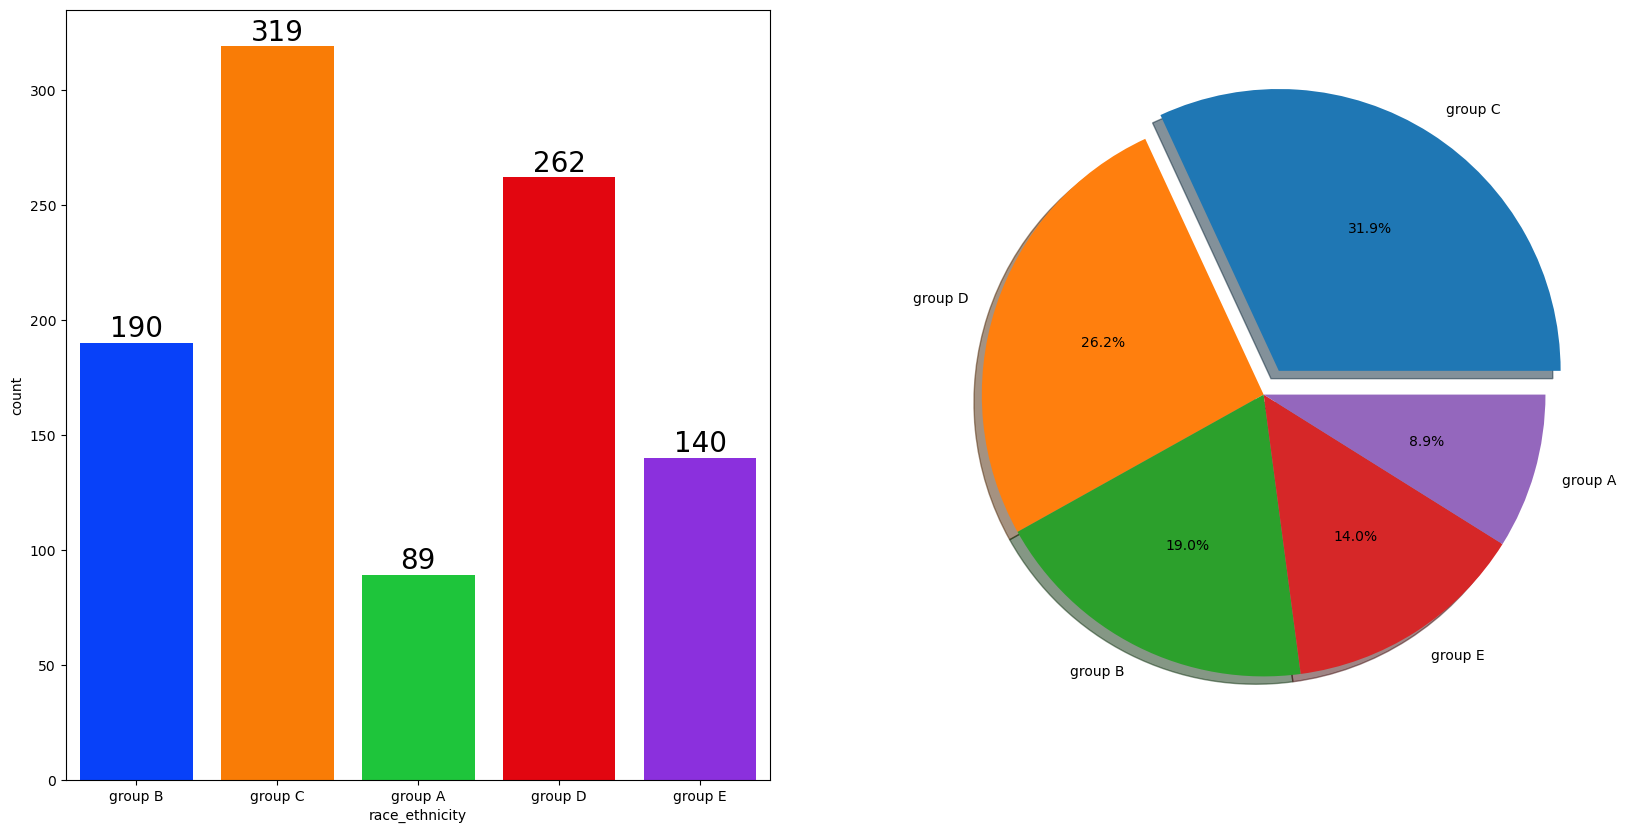

In [38]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

#### Çıkarımlar
- Öğrencilerin çoğu C grubundan / D grubundan.
- En az sayıda öğrenci A grubundan.

#### İKİ DEĞİŞKENLİ ANALİZ (Irk/Etnik kökenin öğrencilerin performansı üzerinde herhangi bir etkisi var mıdır?)

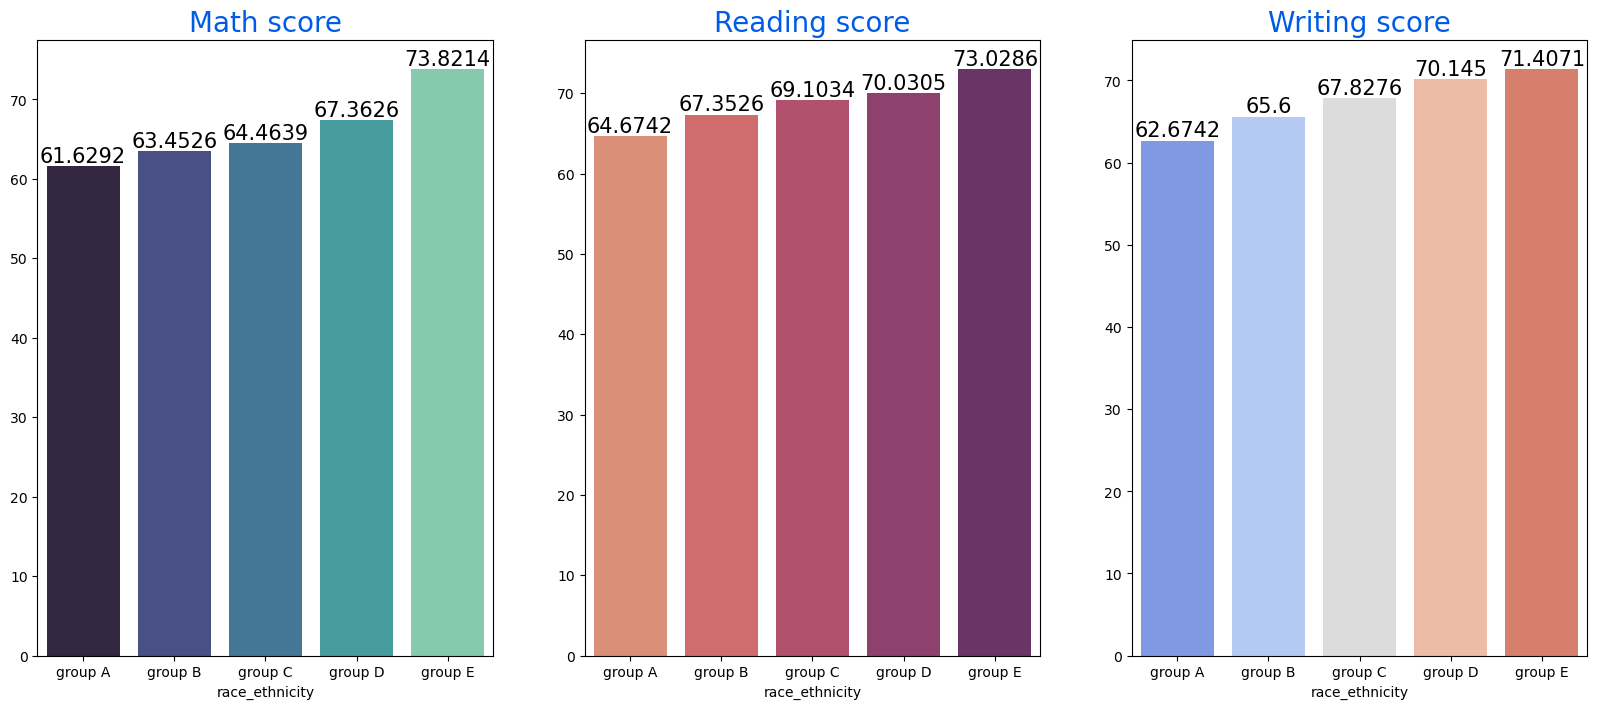

In [39]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Çıkarımlar
- Grup E öğrencileri en yüksek notları aldılar.
- Grup A öğrencileri en düşük notları aldılar.
- Daha düşük sosyoekonomik statüye sahip öğrencilerin tüm ders konularında daha düşük ortalamaları var

#### 4.4.3 EBEVEYN EĞİTİM SEVİYESİ SÜTUNU
- Öğrencinin ebeveyninin eğitim geçmişi nedir?
- Ebeveyn eğitiminin öğrencinin performansı üzerinde herhangi bir etkisi var mıdır?

#### ÜNİDEĞİŞKENLİ ANALİZ (Öğrencinin ebeveyninin eğitim durumu nedir?)

In [49]:
print(df['parental_level_of_education'].astype()


SyntaxError: incomplete input (4066209488.py, line 1)

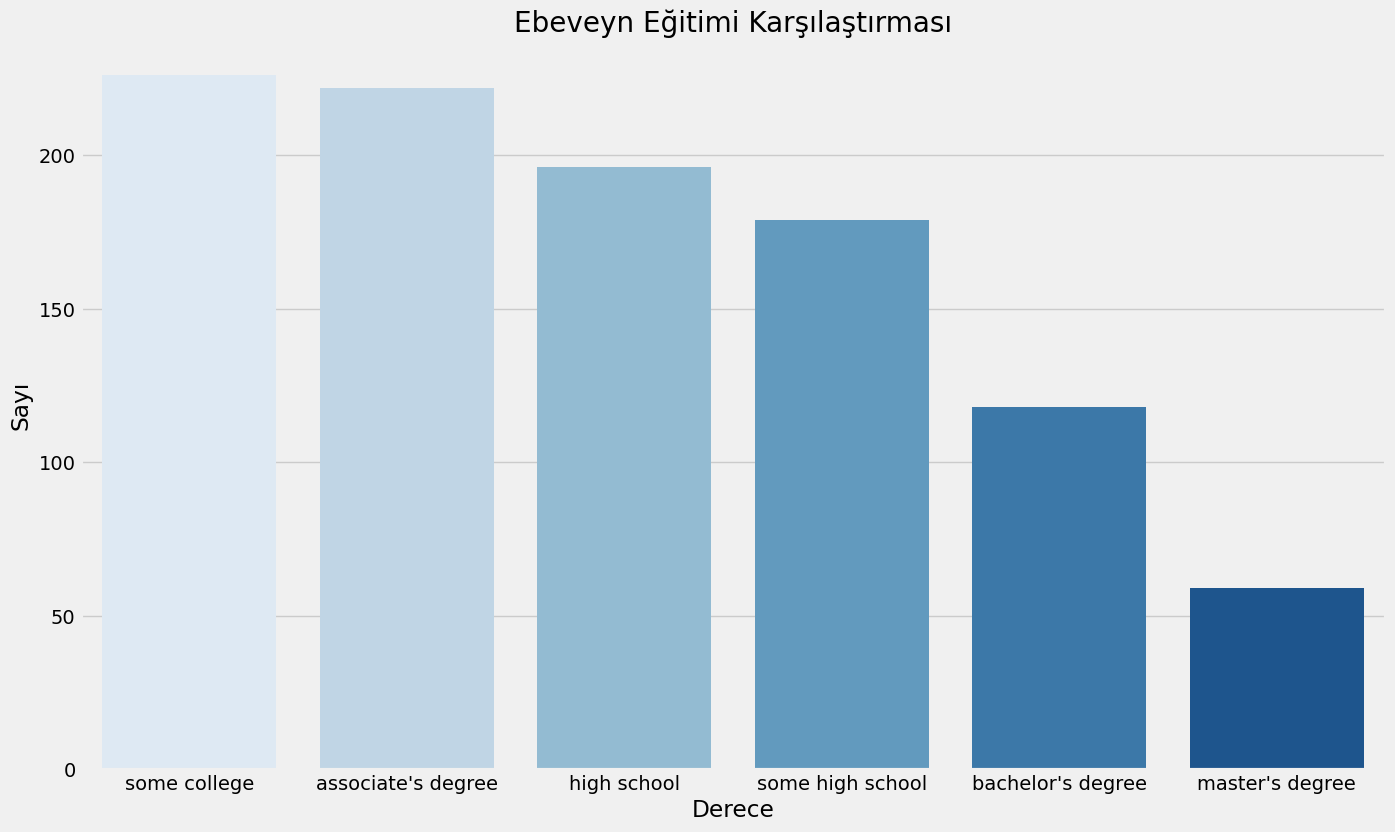

In [50]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

order = df['parental_level_of_education'].value_counts().index

sns.countplot(x='parental_level_of_education', data=df, palette='Blues', order=order)

plt.title('Ebeveyn Eğitimi Karşılaştırması', fontweight=30, fontsize=20)
plt.xlabel('Derece')
plt.ylabel('Sayı')
plt.show()


#### İçgörüler
- Ebeveynlerin büyük çoğunluğu bir üniversiteden geliyor.

#### İKİLİ ANALİZ (Ebeveyn eğitiminin öğrencinin performansı üzerinde herhangi bir etkisi var mıdır?)

In [56]:
# Parental level of education için manuel bir sayısallaştırma yaptık
df2
education_mapping = {
    "some high school": 1,
    "high school": 2,
    "some college": 3,
    "associate's degree": 4,
    "bachelor's degree": 5,
    "master's degree": 6
}

# Sütunu sayılaştırdık
df2['parental_level_of_education_numeric'] = df2['parental_level_of_education'].map(education_mapping)


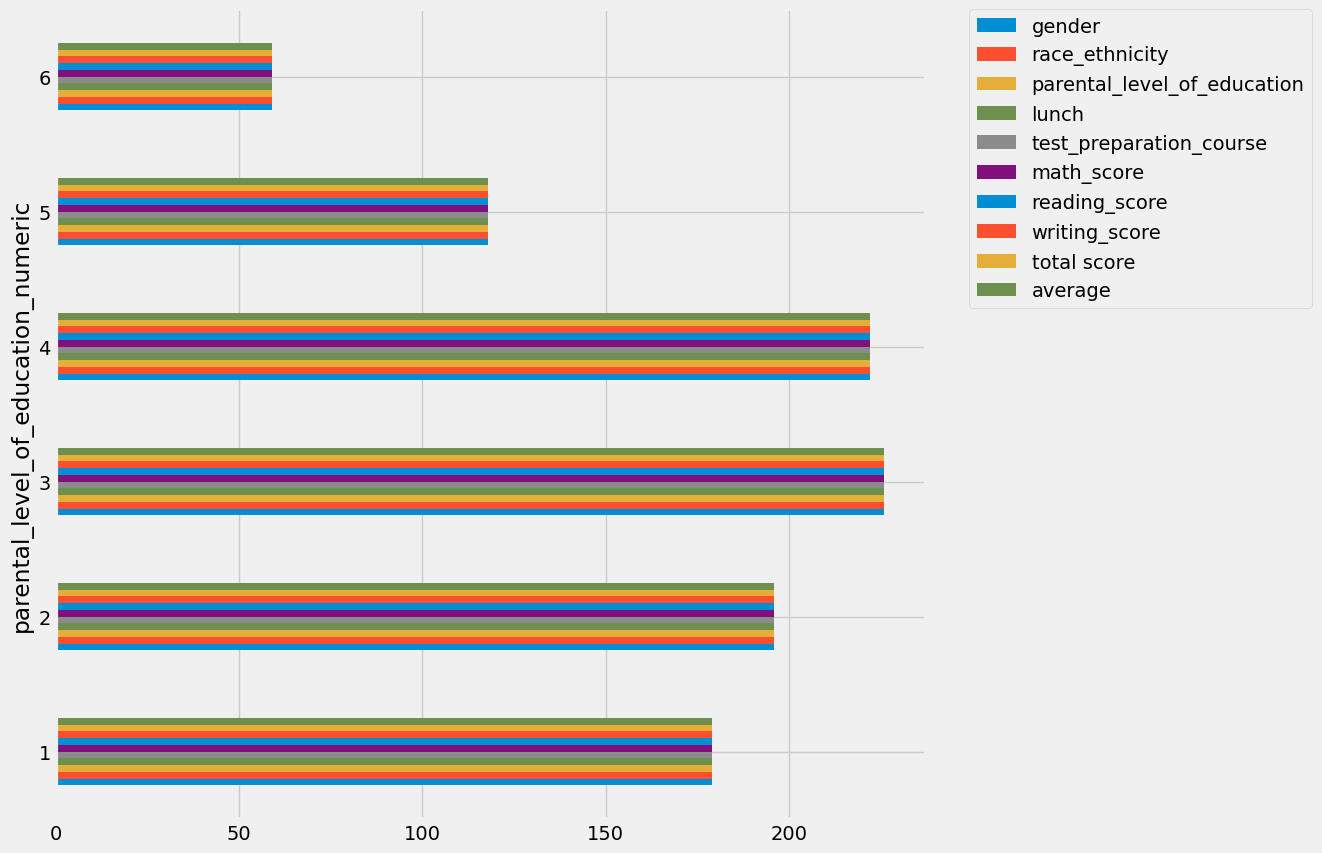

In [58]:
# Gruplama ve ortalamaları alarak grafiği oluşturduk
df2.groupby('parental_level_of_education_numeric').agg('count').plot(kind='barh', figsize=(10, 10))

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()


#### Çıkarımlar
- Ebeveynleri yüksek lisans ve lisans düzeyinde eğitime sahip olan öğrencilerin puanları diğerlerine göre daha yüksektir.

#### 4.4.4 ÖĞLE YEMEĞİ SÜTUNU
- Öğrenciler arasında en yaygın öğle yemeği türü hangisidir?
- Öğle yemeği türünün test sonuçlarına etkisi nedir?

#### TEK DEĞİŞKENLİ ANALİZ (Öğrenciler arasında hangi öğle yemeği türü en yaygındır?)

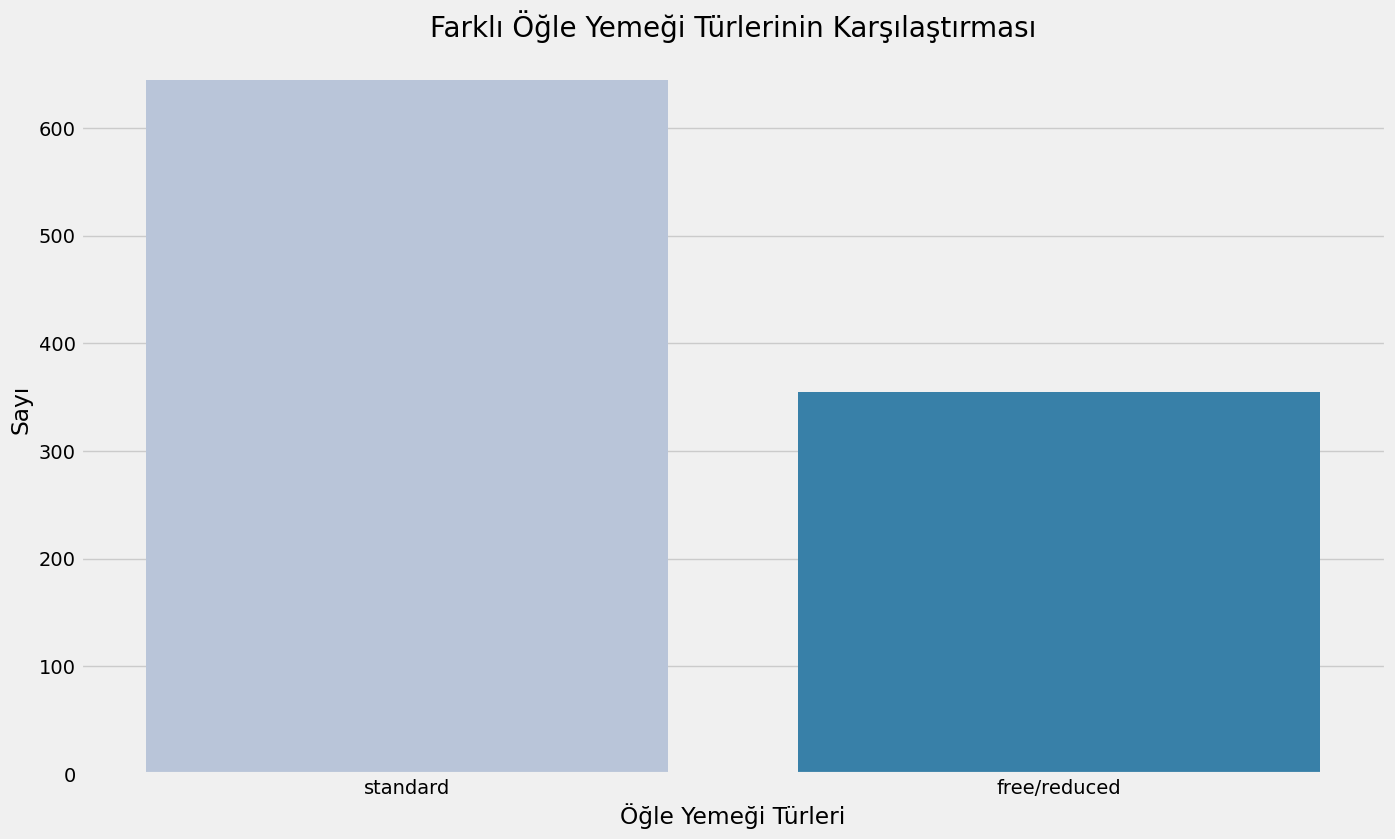

In [66]:
plt.rcParams['figure.figsize'] = (15, 9)

# Lunch sütunundaki kategorileri sayısına göre sıralayarak al
order = df['lunch'].value_counts().index

# Lunch kategorilerinin sırasını kullanarak grafiği oluştur
sns.countplot(x='lunch', data=df, palette='PuBu', order=order)

plt.title('Farklı Öğle Yemeği Türlerinin Karşılaştırması', fontweight=30, fontsize=20)
plt.xlabel('Öğle Yemeği Türleri')
plt.ylabel('Sayı')
plt.show()


#### Çıkarımlar
- Öğrencilere sunulan standart öğle yemeği, ücretsiz öğle yemeğinden daha fazlasıydı

#### İKİLİ ANALİZ (Öğle yemeği türü alımının öğrencinin performansı üzerinde herhangi bir etkisi var mıdır?)

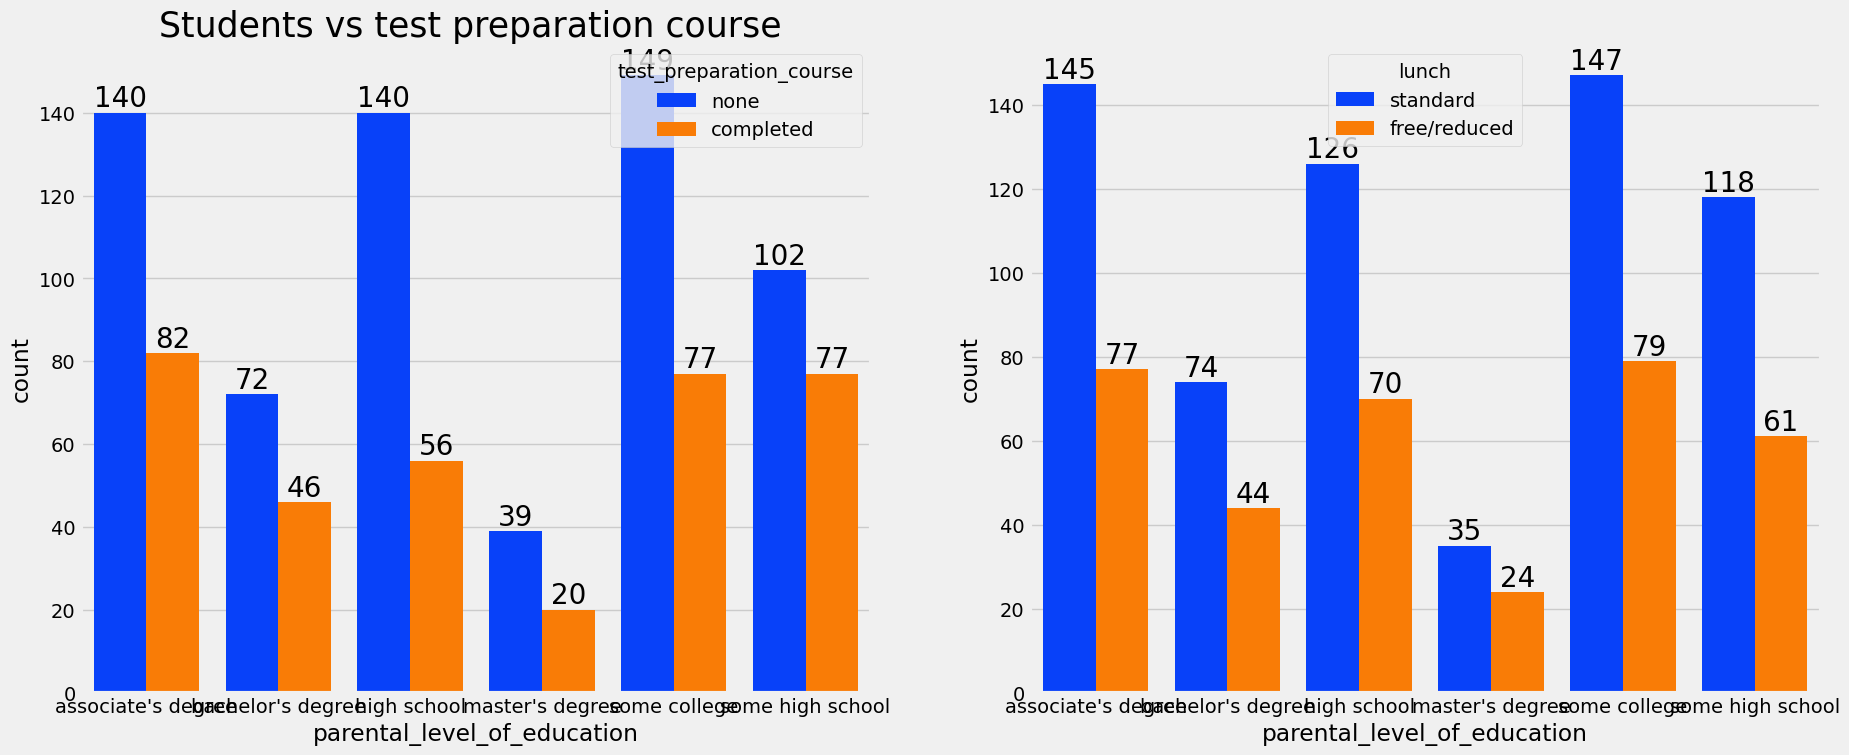

In [69]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   

#### Çıkarımlar
- Standart Öğle Yemeği alan öğrenciler, ücretsiz/indirimli öğle yemeği alan öğrencilere göre daha iyi performans gösterme eğilimindedir

#### 4.4.5 SINAV HAZIRLIK DERSİ SÜTUNU
- Öğrenciler arasında en yaygın öğle yemeği türü hangisidir?
- Sınav hazırlık dersinin öğrencinin performansı üzerinde herhangi bir etkisi var mıdır?

#### İKİLİ ANALİZ (Sınav hazırlık kursunun öğrencinin performansı üzerinde herhangi bir etkisi var mıdır?)

<Axes: xlabel='lunch', ylabel='writing_score'>

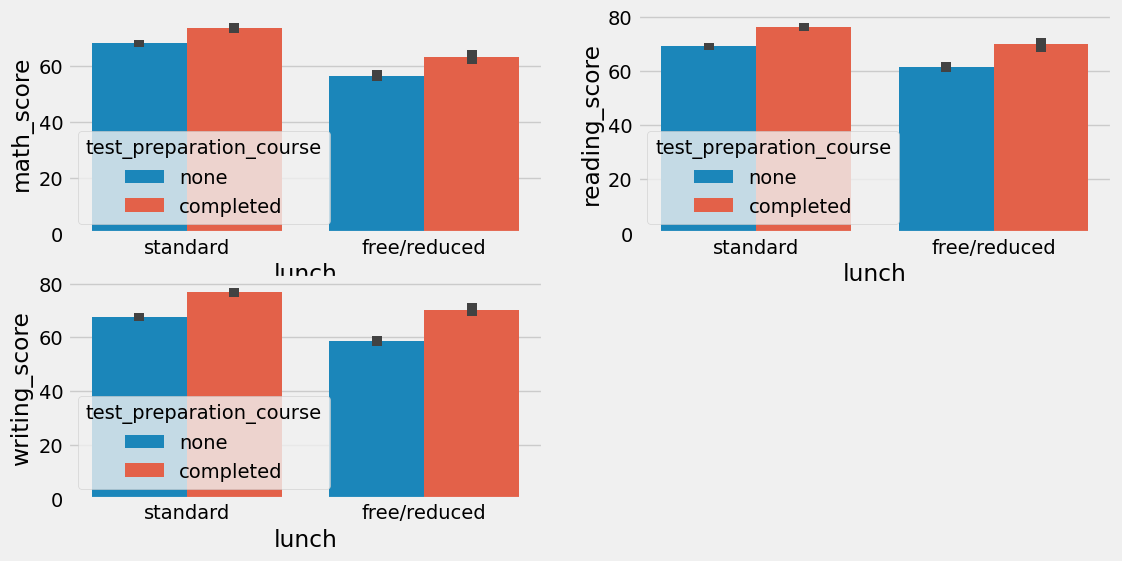

In [72]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Çıkarımlar
- Sınav Hazırlık Kursunu tamamlayan öğrencilerin, kursu almayanlara göre her üç kategoride de daha yüksek puanları vardır

#### 4.4.6 AYKIRI DEĞERLERİ KONTROL ETME

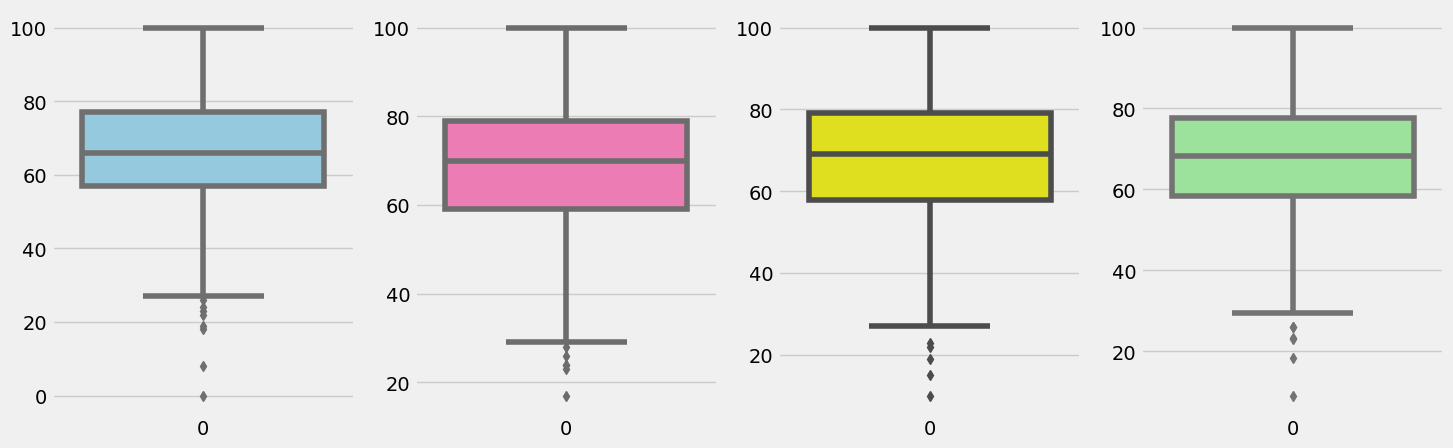

In [74]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 PAIRPLOT KULLANARAK ÇOK DEĞİŞKENLİ ANALİZ

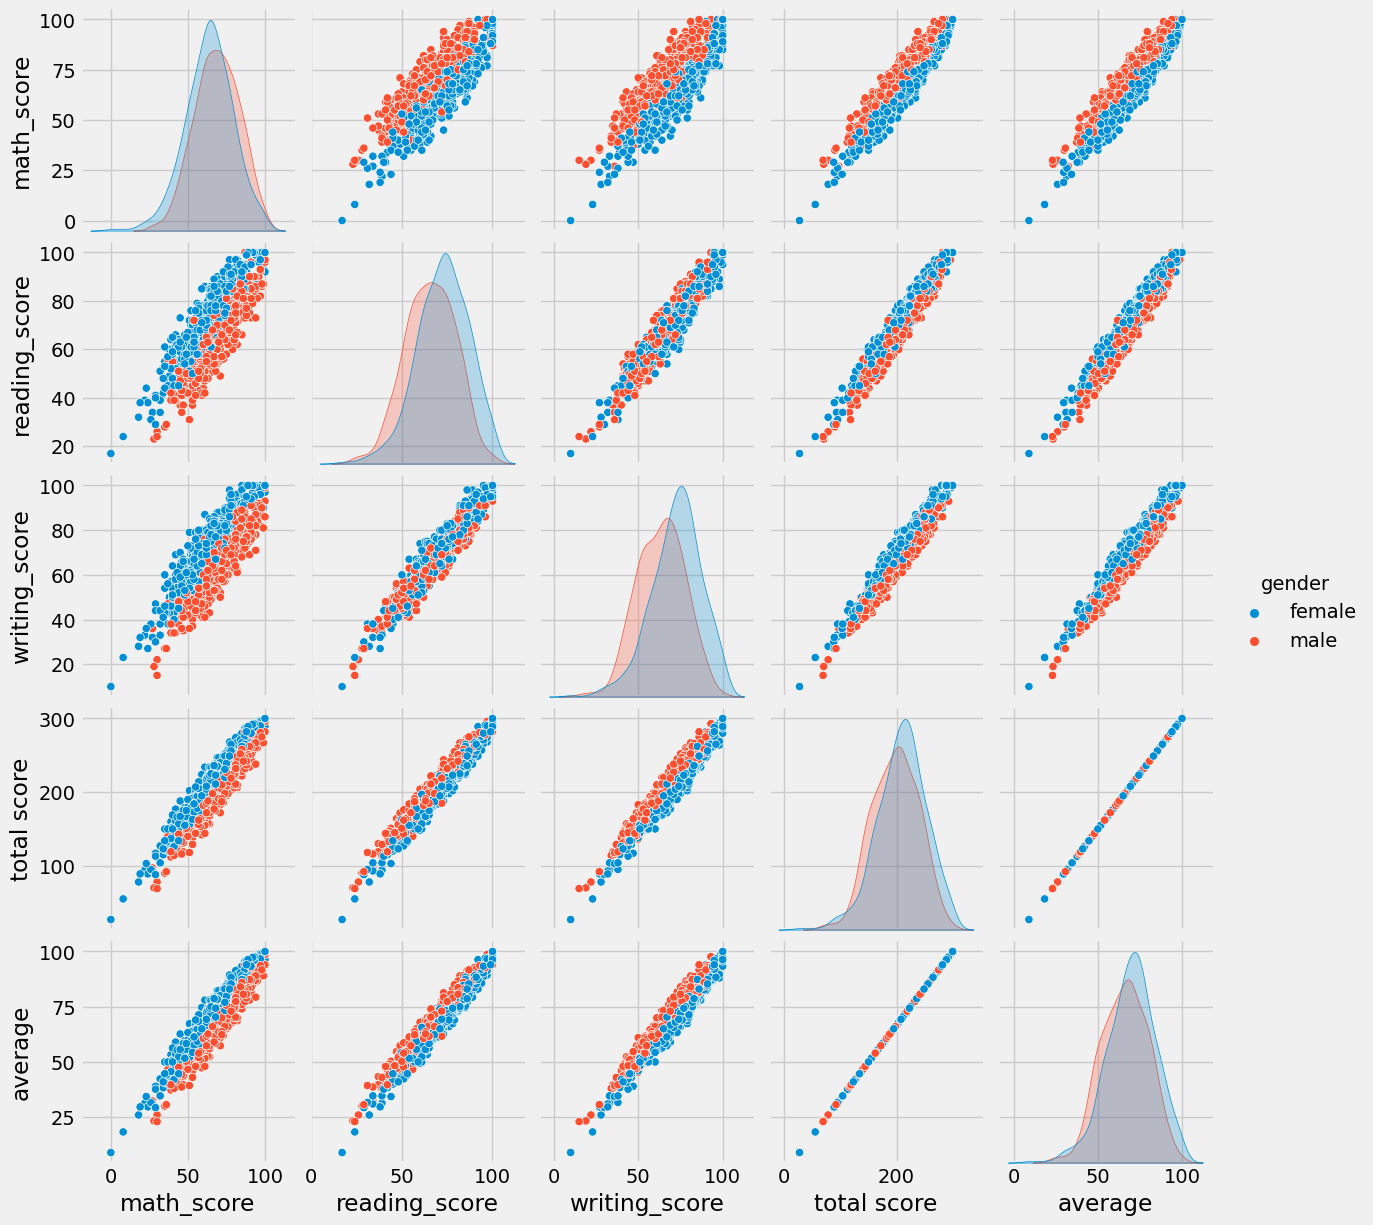

In [75]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Çıkarımlar

- Yukarıdaki grafikten, tüm puanların birbirleriyle doğrusal olarak arttığı açıktır.

### 5. Sonuçlar
- Öğrencinin Performansı öğle yemeği, ırk, ebeveyn düzeyindeki eğitimle ilgilidir
- Kadınlar geçme yüzdesinde öndedir ve ayrıca en yüksek puanları alırlar
- Öğrencinin Performansı sınav hazırlık kursuyla çok fazla ilişkili değildir
- Hazırlık kursunu bitirmek faydalıdır.